In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from netdlem2 import DLEM
import seaborn
import util
import einops

In [2]:
dev = torch.device('cuda')

In [3]:
patch = np.log(np.load("patch.npy"))
#patch = np.mean(einops.rearrange(patch, "(w wb) (h hb) -> w h (wb hb)", wb=20, hb=20), axis=(-1))

In [4]:
patch = util.tile_patch(patch, kernel_size=20)

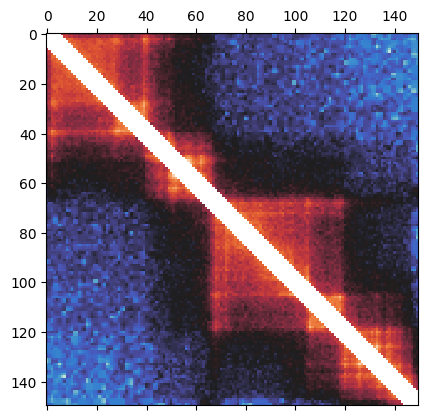

In [5]:
plt.matshow(util.ignore_diag_plot(patch, 5), cmap='icefire')

In [6]:
patch = util.diagonal_normalize(patch)

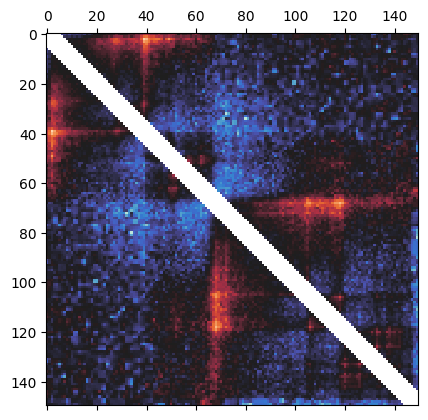

In [7]:
plt.matshow(util.ignore_diag_plot(patch, 5), cmap='icefire')

In [8]:
model = DLEM(np.ones(patch.shape[0]) * 0.95, np.ones(patch.shape[0]) * 0.95)

In [9]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [10]:
diag_stop = int(np.floor(patch.shape[0]*0.3)) #we don't get much information from the corner anyway

In [11]:
best_loss_model, best_corr_model, arr_loss, arr_corr = util.train(model, optimizer, torch.nn.MSELoss(), np.exp(patch), 3, diag_stop, dev)

Text(0, 0.5, 'correlation')

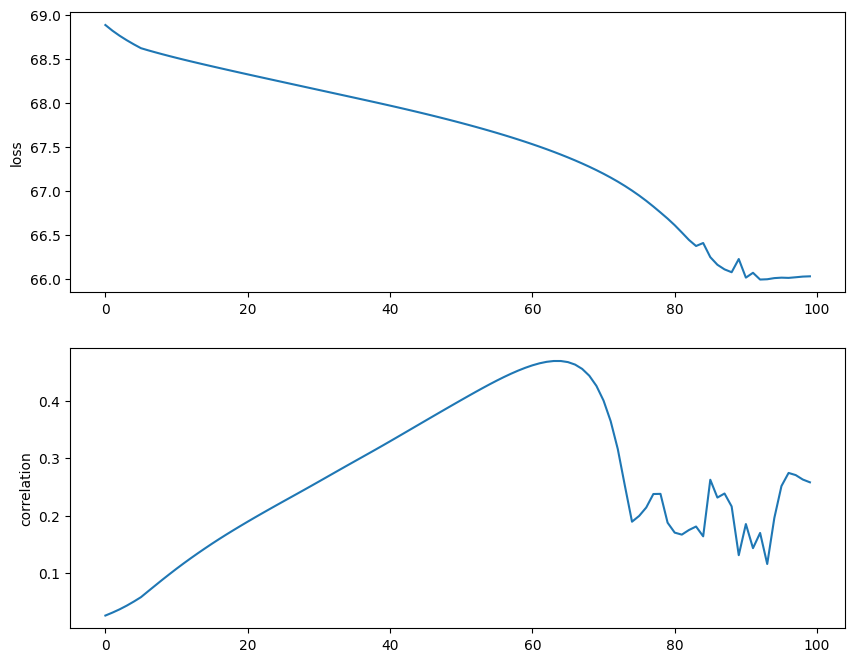

In [12]:
fig, axes = plt.subplots(nrows=2, figsize=(10,8))
axes[0].plot(arr_loss)
axes[0].set_ylabel("loss")
axes[1].plot(arr_corr)
axes[1].set_ylabel("correlation")

In [13]:
best_loss_pred = best_loss_model.contact_map_prediction(torch.ones(patch.shape[0], device=dev) * patch.shape[0]).detach().cpu().numpy()
best_corr_pred = best_corr_model.contact_map_prediction(torch.ones(patch.shape[0], device=dev) * patch.shape[0]).detach().cpu().numpy()

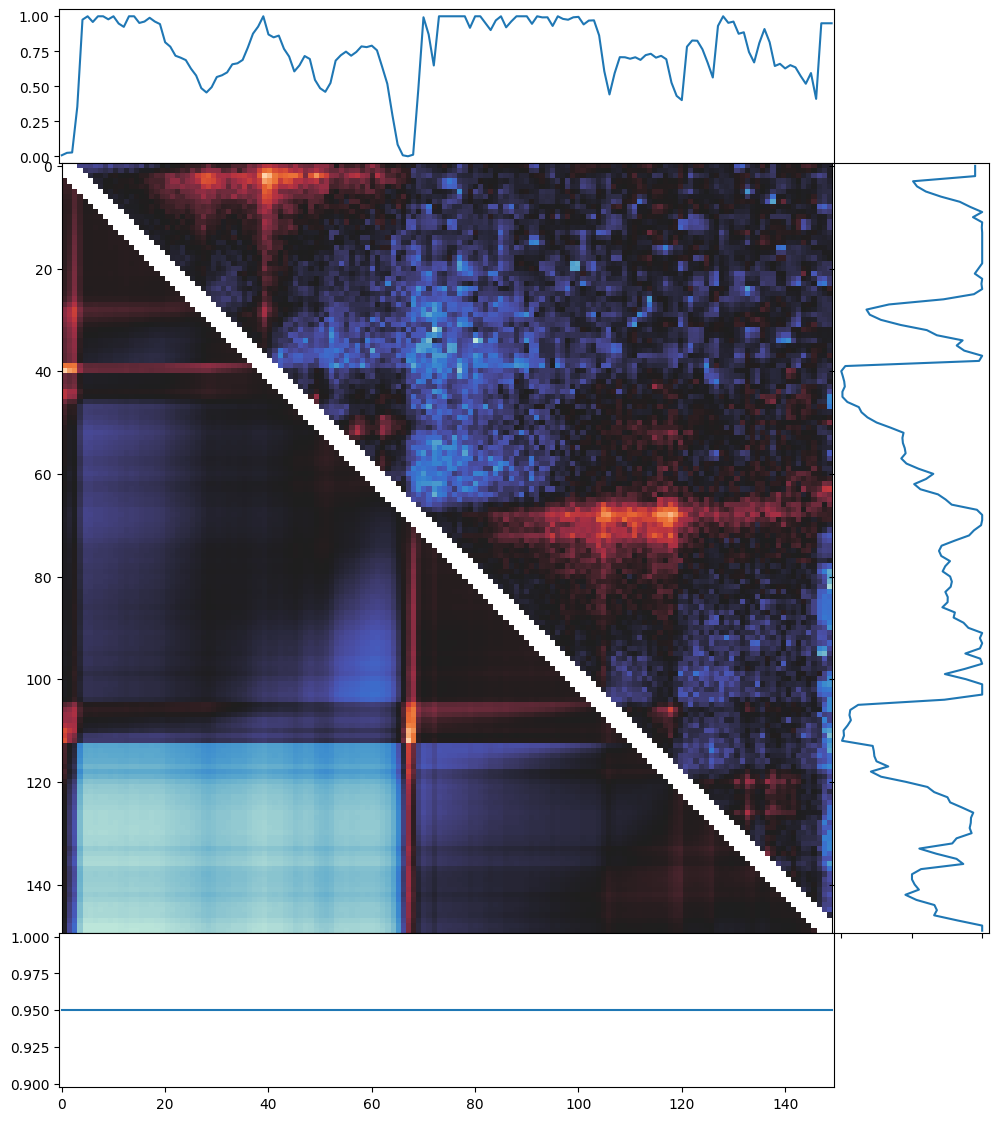

In [14]:
util.plot_results(patch, np.log(best_loss_pred), best_loss_model.return_parameters())

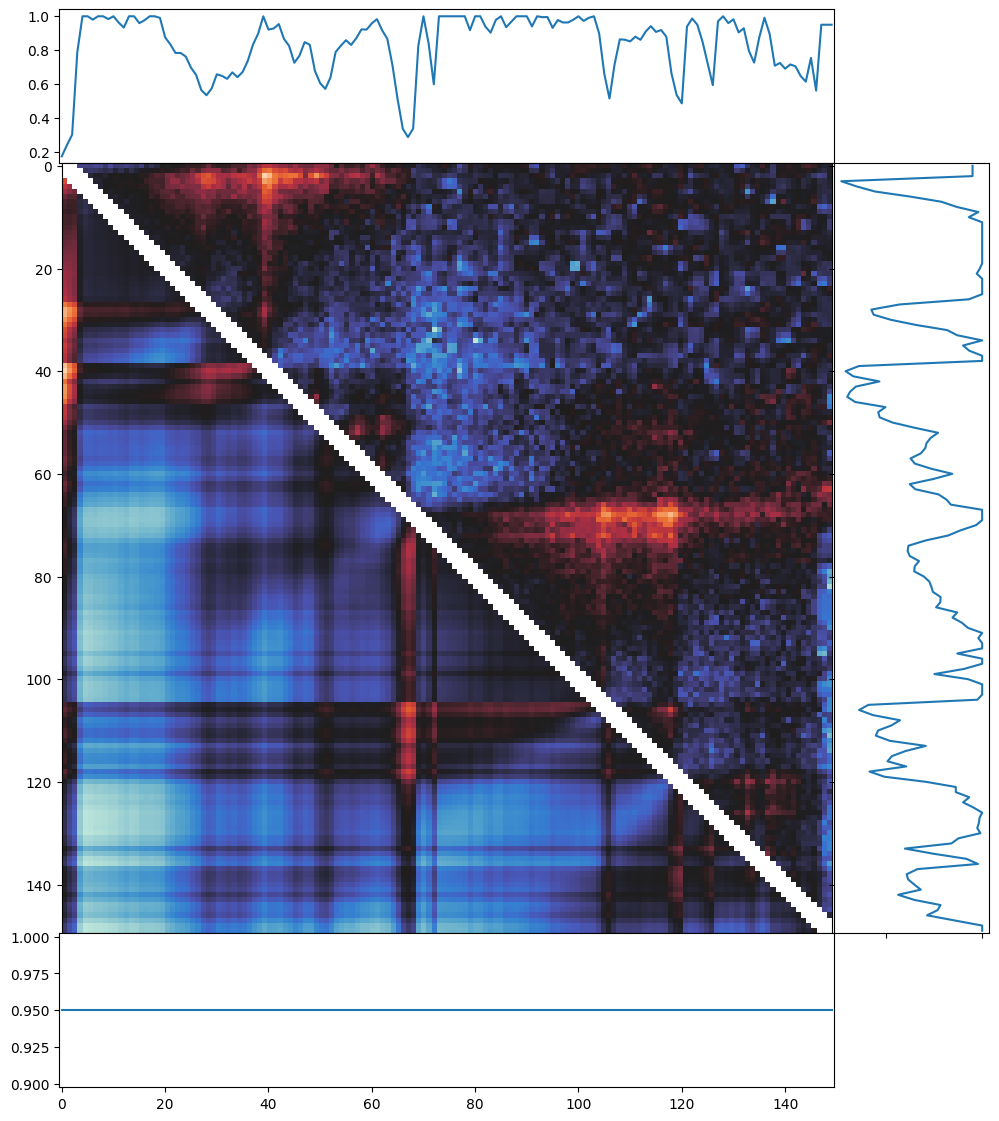

In [15]:
util.plot_results(patch, np.log(best_corr_pred), best_corr_model.return_parameters())